In [1]:
from FaceLoader import FaceLoader
from SocialProcessor import SocialProcessor
import cv2
import numpy as np
from matplotlib.pyplot import imshow
import os
from keras_facenet import FaceNet
import keras.backend.tensorflow_backend as tb
tb._SYMBOLIC_SCOPE.value = True
os.environ['KMP_DUPLICATE_LIB_OK']='True'


import mysql.connector

from IPython.display import Image


%matplotlib inline

Using TensorFlow backend.


In [2]:
url = "https://sun3-13.userapi.com/F9KxGJD8VQseypU2PCYncdKh_vAhhFVRl-QFPQ/PFgSQWbEgnM.jpg"
loader = FaceLoader(url)
loader.downloadImg()

In [3]:
loader.local_url

'./tmp/d52ec3c3bc4291ed2e02b91df8499c66.jpg'

In [4]:
images = loader.load_and_align_image()

In [5]:
ind = 0

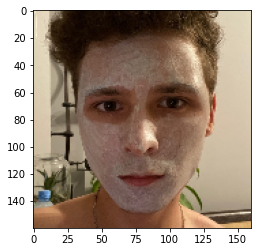

In [6]:
imshow(images[ind])

In [7]:
model = FaceNet()

In [8]:
embs = loader.calc_embs(model=model, images=images)

In [9]:
conn = mysql.connector.connect(user='face', host="localhost", password="Hr3mI3PM5JlFWrub", database='global_scrape', port=8889, collation="utf8mb4_general_ci")

In [11]:
processor = SocialProcessor(conn, model)

In [12]:
matches = processor.findMatches(embs[ind], batch=1000, threshold=1)

In [13]:
print(len(matches))

359


-1.00509147671346e-08
https://vk.com/id180474258
https://sun9-26.userapi.com/c844321/v844321335/19442b/8enDisiSyLU.jpg


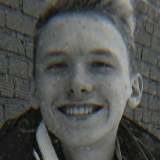

In [18]:
match_ind = 356
print(matches[match_ind][-1])
print("https://vk.com/id"+matches[match_ind][-4])
print(matches[match_ind][0])
Image(filename='./fragments/' + matches[match_ind][-2] + '.png')